# Advanced Plot Customization in Matplotlib

## Glossary:

1. **MaxNLocator** (from `matplotlib.ticker`)

2. **GridSpec** (from `matplotlib.gridspec`)
3. **LinearSegmentedColormap** (from `matplotlib.colors`)

### 1. MaxNLocator

- **IMPORT** : `from matplotlib.ticker import MaxNLocator`

- Used for controlling the ***number*** and ***placement of axis ticks*** (numbers/labels on x or y-axis).

**Use it when:**
  - You want **integer-only** ticks.

  - You want to **limit** the number of ticks.

  - You want **consistent spacing** between ticks.


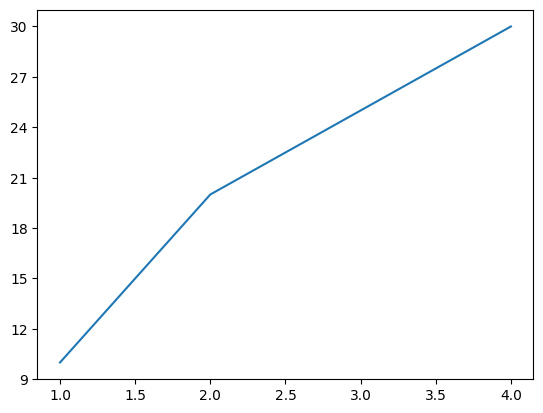

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Only integer y-ticks
plt.show()


### 2. GridSpec
- **IMPORT :** `from matplotlib.gridspec import GridSpec`

- **SYNTAX :** `GridSpec(nrows, ncols)`


**Why use GridSpec instead of plt.subplots() ?**   
- `plt.subplots()` gives you equally sized subplots in a grid. But when you want:

  - Different **subplot sizes**.

  - A plot that spans **multiple rows or columns**.

  - Precise **manual control** over layout.

  - **Asymmetric or non-uniform** subplot design.

####  Use Case 1: One subplot wider than the other

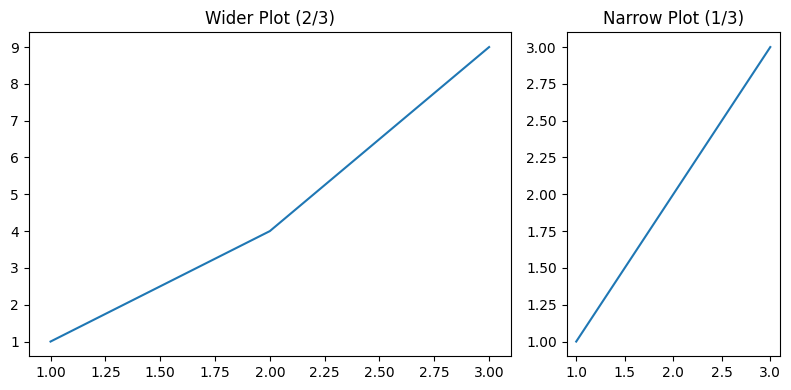

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1, 3)  # 1 row and 3 columns

ax1 = fig.add_subplot(gs[0, 0:2])  # Spans columns 0 and 1
ax2 = fig.add_subplot(gs[0, 2])    # Only column 2

ax1.set_title("Wider Plot (2/3)")
ax2.set_title("Narrow Plot (1/3)")

ax1.plot([1, 2, 3], [1, 4, 9])
ax2.plot([1, 2, 3], [1, 2, 3])

plt.tight_layout()
plt.show()


#### Use Case 2: Vertical stacking

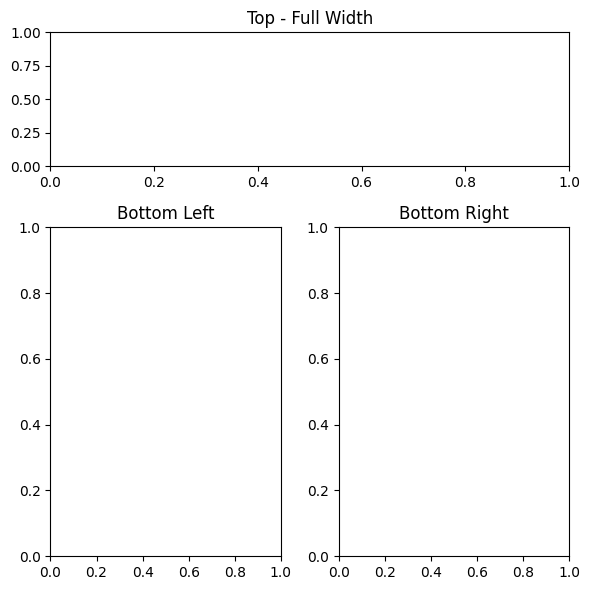

In [ ]:
fig = plt.figure(figsize=(6, 6))
gs = GridSpec(3, 2)  # 3 rows, and 2 columns

ax1 = fig.add_subplot(gs[0, :])    # Top row, full width i.e. covering all columns in first row.
ax2 = fig.add_subplot(gs[1:, 0])   # Bottom two rows, left column i.e. 1st column in 2nd row.
ax3 = fig.add_subplot(gs[1:, 1])   # Bottom two rows, right column

ax1.set_title("Top - Full Width")
ax2.set_title("Bottom Left")
ax3.set_title("Bottom Right")

plt.tight_layout()
plt.show()


#### Use Case 3: Asymmetric layout (Dashboard-style)

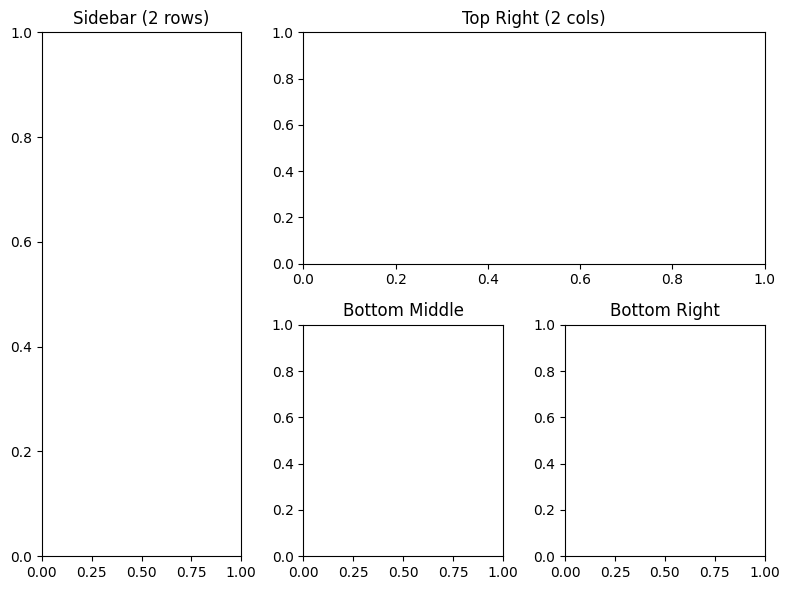

In [15]:
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 3)

ax1 = fig.add_subplot(gs[:, 0])    # All rows, left column
ax2 = fig.add_subplot(gs[0, 1:])   # First row, middle & right columns
ax3 = fig.add_subplot(gs[1, 1])    # Second row, middle column
ax4 = fig.add_subplot(gs[1, 2])    # Second row, right column

ax1.set_title("Sidebar (2 rows)")
ax2.set_title("Top Right (2 cols)")
ax3.set_title("Bottom Middle")
ax4.set_title("Bottom Right")

plt.tight_layout()
plt.show()


### 3. LinearSegmentedColormap
- This is a **class** from `matplotlib.colors` used to define **custom color gradients** with smooth transitions between colors.

- **IMPORT :** `from matplotlib.colors import LinearSegmentedColormap`.

- Used for creating ***custom color gradients*** for things like **heatmaps**, **scatter plots**, or **image displays**.

**Use it when:**

 - You want a custom or branded color gradient (e.g., from red → white → green).

 - You want to visualize intensity (e.g., population density, error heatmaps).



---

#### 🔹 `.from_list(...)`

 - This is a **class method** that allows you to create a color gradient by specifying:
    1. A **name** for the colormap (e.g., `"my_cmap"`) 
    
    2. A **list of colors** (e.g., `["blue", "white", "red"]`)

> Think of it like:  
> 🔵 → ⚪ → 🔴  
> As your data value increases, the color will smoothly transition from blue to white to red.


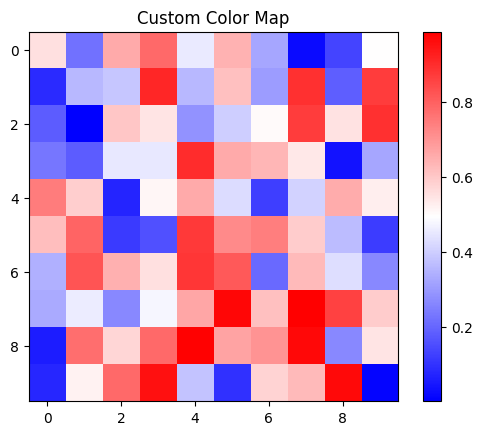

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ["blue", "white", "red"]
custom_cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

data = np.random.rand(10, 10)
plt.imshow(data, cmap=custom_cmap)
plt.colorbar()
plt.title("Custom Color Map")
plt.show()
